# Machine Learning Final Project

## Importing Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

# Preliminary Data Analysis

Load in the training and test data.

In [2]:
#training data
train = pd.read_csv("train.csv")
print(train.head()) #print the first few rows
print("Train shape: ")
print(train.shape) #look at the shape of the training data

#test data test
test = pd.read_csv("test.csv")
print(test.head()) #print the first few rows
print("Test shape: ")
print(test.shape) #look at the shape of the test data

   Unnamed: 0 Kingdom  DNAtype  SpeciesID  Ncodons  \
0         872     vrl        0     207343     6686   
1        9865     inv        0       7629    10060   
2        3190     bct        0     320850    14031   
3        3674     bct        0       1397    39839   
4       11372     vrt        1      50790     5112   

                            SpeciesName      UUU      UUC      UUA      UUG  \
0                    Bovine foamy virus  0.01541  0.00927  0.01720  0.01825   
1              Anthocidaris crassispina  0.01213  0.02515  0.00268  0.01352   
2               Staphylococcus phage X2  0.02580  0.01618  0.03606  0.01354   
3                    Bacillus circulans  0.00128  0.02141  0.01225  0.01649   
4  mitochondrion Dascyllus trimaculatus  0.03169  0.01780  0.03893  0.00000   

   ...      CGG      AGA      AGG      GAU      GAC      GAA      GAG  \
0  ...  0.00643  0.02064  0.01182  0.02812  0.00838  0.03365  0.01974   
1  ...  0.00268  0.00915  0.01412  0.03280  0.02555  0

### Data pre processing
There should be a total of 69/68 columns: 67 attributes (64/63 codons, SpeciesName, SpeciesID, and Ncodons) and 2 specifying the classification of the sample (Kingdom and DNAtype). The amount of columns for codons differs because the column for the AGA codon is missing in the test data. There's seems to be an additional column in the train and test object (Unnamed: 0), so we remove it here.

In [3]:
train=train.drop(columns='Unnamed: 0') #drop the specified column
print(train.head()) 
test=test.drop(columns='Unnamed: 0') #drop the specified column
print(test.head())

  Kingdom  DNAtype  SpeciesID  Ncodons                           SpeciesName  \
0     vrl        0     207343     6686                    Bovine foamy virus   
1     inv        0       7629    10060              Anthocidaris crassispina   
2     bct        0     320850    14031               Staphylococcus phage X2   
3     bct        0       1397    39839                    Bacillus circulans   
4     vrt        1      50790     5112  mitochondrion Dascyllus trimaculatus   

       UUU      UUC      UUA      UUG      CUU  ...      CGG      AGA  \
0  0.01541  0.00927  0.01720  0.01825  0.01436  ...  0.00643  0.02064   
1  0.01213  0.02515  0.00268  0.01352  0.01372  ...  0.00268  0.00915   
2  0.02580  0.01618  0.03606  0.01354  0.00848  ...  0.00114  0.01775   
3  0.00128  0.02141  0.01225  0.01649  0.01330  ...  0.01177  0.00705   
4  0.03169  0.01780  0.03893  0.00000  0.06240  ...  0.00000  0.00000   

       AGG      GAU      GAC      GAA      GAG      UAA      UAG      UGA  
0  0

Next we check to see if there is any missing data. The project specification says that aside from the missing AGA column of the test data, there should not be any missing data, so this acts as a sanity check to ensure the data is as intended.

In [4]:
#check how many samples with missing values there are in
(pd.isna(train).sum()>0).sum() #the train data
(pd.isna(test).sum()>0).sum() #and the test data

0

0

TODO: Choose whether to use one-hot encoding. Although it can be used, scikitlearn can also handle the values as is. Also split the data into X and y.

Here we take our train and test data and split into X, containing the features, and y_kingdom and y_dnatype, containing the classifications.

In [19]:
X_features=['SpeciesID', 'Ncodons', 'SpeciesName', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'] #all the feature columns present in the training data
X_train=train[X_features] #put in our X for training only the columns containing features
X_train.shape #verify that there are now 67 columns
#grab the columns containing the classification data
y_train_kingdom=train['Kingdom']
y_train_dnatype=train['DNAtype']
y_train_kingdom


(10422, 67)

0        vrl
1        inv
2        bct
3        bct
4        vrt
        ... 
10417    pln
10418    vrl
10419    bct
10420    pln
10421    pln
Name: Kingdom, Length: 10422, dtype: object

In [20]:
from sklearn.preprocessing import LabelBinarizer

# Convert famhist into a one-hot encoding
pd_data_temp = LabelBinarizer().fit_transform(y_train_kingdom)
#pd_data_temp = onehot_feature(train, 'DNAtype')
pd_data_temp
#TODO: change to account for y not having a data type

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Data Visualization

<Axes: >

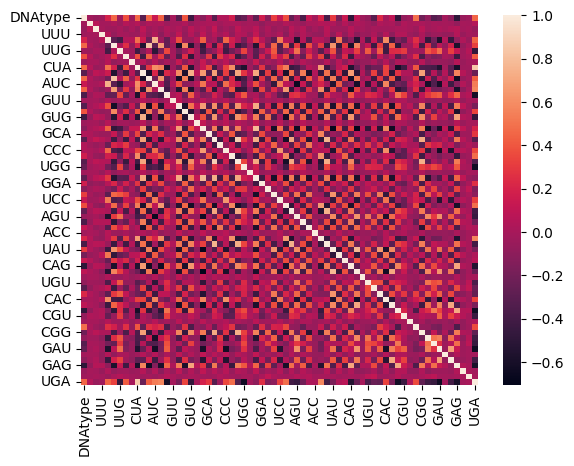

In [22]:
corr = train.corr(numeric_only=True)
#display the heatmap
sns.heatmap(corr)

## Clustering Analysis

# Classification